In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2
from matplotlib import pyplot as plt
import imutils

import easyocr

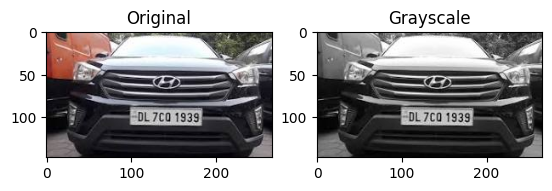

In [20]:
import cv2
from matplotlib import pyplot as plt

# Check and set the correct working directory if needed
# import os
# os.chdir("path/to/your/image/folder")

# Load the image
img = cv2.imread("image2.jpeg")

# Check if the image is loaded successfully
if img is not None:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display the original and grayscale images
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(122), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
    plt.show()
else:
    print("Error: Image not loaded.")


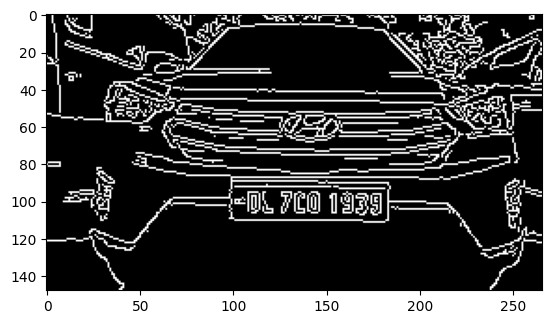

In [21]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [22]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [23]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location=approx
        break

In [24]:
location

array([[[ 98,  94]],

       [[182,  90]],

       [[183, 109]],

       [[101, 110]]], dtype=int32)

In [25]:
import numpy as np
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

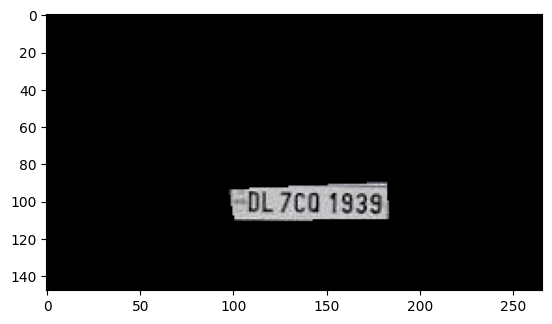

In [26]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [27]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

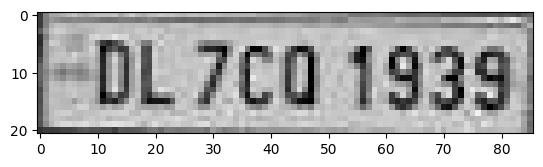

In [28]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [29]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[9, 3], [85, 3], [85, 21], [9, 21]], 'DL 7C0 1939', 0.7807422573945613)]

DL 7C0 1939


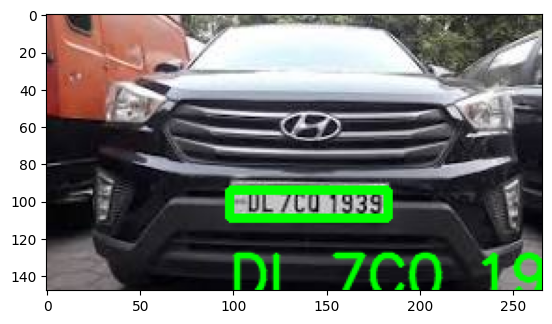

In [30]:
import cv2
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread("image2.jpeg")

# Your code for finding contours and getting the approx polygon...

# Draw the rectangle
if len(approx) == 4:  # Check if the polygon is a quadrilateral
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    text=result[0][-2]
    font=cv2.FONT_HERSHEY_SIMPLEX
    print(text)
    res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
    # Display the result
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Error: The contour is not a quadrilateral.")


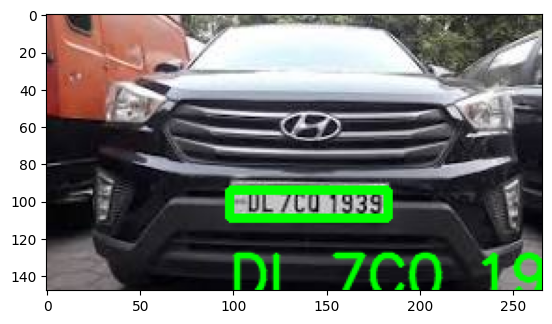

Text saved to text_data.csv


In [32]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd

# Load the image
img = cv2.imread("image2.jpeg")

# Your code for finding contours and getting the approx polygon...

# Draw the rectangle
if len(approx) == 4:  # Check if the polygon is a quadrilateral
    result = []

    
    
    # Save the text to a CSV file
    result.append({'Text': text, 'X_coordinate': approx[0][0][0], 'Y_coordinate': approx[1][0][1] + 60})
    df = pd.DataFrame(result)
    df.to_csv('text_data1.csv', index=False)

    # Draw the rectangle and text on the image
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1] + 60), fontFace=font, fontScale=1,
                      color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

    # Display the result
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.show()

    print("Text saved to text_data.csv")
else:
    print("Error: The contour is not a quadrilateral.")
